<a href="https://colab.research.google.com/github/VISHWAJITT123/CVG-FILES/blob/master/cifar10_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Loading the dataset
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [5]:
#Get the shape of the data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [23]:
print(y_train.shape)

(50000, 1)


In [25]:
print(y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [8]:
y_train = y_train.reshape(-1)
print(y_train[:5])

[6 9 9 4 1]


In [9]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


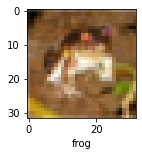

In [30]:
plot_sample(x_train,y_train,0)

In [15]:
model = Sequential()
model.add(Conv2D(3000,kernel_size=3, activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(1500,kernel_size=3,activation='relu'))
model.add(Conv2D(512,kernel_size=3, activation='relu'))
model.add(Conv2D(256,kernel_size=3,activation='relu'))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [16]:
#Compile the model
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [17]:
hist = model.fit(x_train,y_train_one_hot,validation_data=(x_test,y_test_one_hot),epochs= 3)

Epoch 1/3
1563/1563 [==============================] - 1688s 1s/step - loss: 44.1806 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/3
1563/1563 [==============================] - 1614s 1s/step - loss: 2.5481 - accuracy: 0.1013 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/3
1563/1563 [==============================] - 1623s 1s/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000


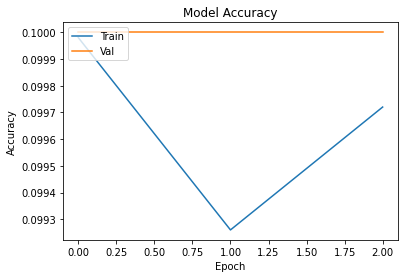

In [18]:
#Visualize The model Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

In [15]:
#Show probabilities for the first four images in the test set
predictions = model.predict(x_test[:4])
predictions

array([[8.44978821e-03, 9.52336180e-04, 5.63950315e-02, 1.35242954e-01,
        4.13236842e-02, 9.03778300e-02, 5.92065275e-01, 5.17330393e-02,
        1.88312232e-02, 4.62893210e-03],
       [9.30524431e-03, 8.05152893e-01, 4.02842561e-04, 4.19678137e-04,
        7.16693685e-05, 5.98210354e-05, 8.66635503e-07, 2.14441079e-05,
        1.23780295e-01, 6.07852265e-02],
       [2.02123284e-01, 2.05445483e-01, 3.09319440e-02, 1.59840304e-02,
        1.07020298e-02, 1.42398663e-02, 4.92790202e-03, 1.97858736e-02,
        3.61548066e-01, 1.34311467e-01],
       [2.67161340e-01, 7.14552328e-02, 1.34638399e-02, 1.61806482e-03,
        9.85590043e-04, 3.02545173e-04, 2.63432902e-03, 1.96211459e-03,
        5.99033833e-01, 4.13830876e-02]], dtype=float32)

In [16]:
#Print our predictions as labels for our first four data
pred =np.argmax(predictions,axis = 1)
print(pred)
#Print the Actual labels

print(y_test[:4])

[6 1 8 8]
[[3]
 [8]
 [8]
 [0]]
